## Code to analyse the demogrphic details of the feedback 

In [187]:
### Load all relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [188]:
# add the aeroport font for the plots

import matplotlib.font_manager as fm

font_path = '/Users/johanna/Downloads/Aeroport.ttf'  # the location of the font file
my_font = fm.FontProperties(fname=font_path)  # get the font based on the font_path

In [189]:
# define where plots are saved
folder_figures_save='/Users/johanna/Library/CloudStorage/GoogleDrive-johanna@limbic.ai/Shared drives/05_Research/Publications (research papers)/Clinical/Increased_Access/Figures/'


### Clean and group the qualitative feedback theme labels for analysis between demographic groups

In [190]:
## load the dataset of all feedback with labels

df_all= pd.read_csv('/Users/johanna/Library/CloudStorage/GoogleDrive-johanna@limbic.ai/Shared drives/05_Research/Data/Clinical/IncreasedAccess/referral_feedback_from_database_16_03_2023_with_predicted_labels_new.csv')

# this is not made available due to privacy and consent of the participants!

df = df_all[df_all['isHelpful'].notna()]
df = df[df['feedback'].notna()]

In [191]:
# remove rows that have less than 10 characters

print('number of datapoints before cleaning:', len(df))


df = df[df['feedback'].apply(lambda x: len(x) > 9)] 

print('number of datapoints after cleaning:', len(df))

number of datapoints before cleaning: 46165
number of datapoints after cleaning: 42332


In [192]:
# calculate the length of the feedback
df['charcount'] = df['feedback'].apply(len)

In [193]:
# Define shorter theme names for each theme

feedback_map = {'Help at the time of need that was given fast and easy to use': 'Convenient',
               'A hopeful first-step to care that was thoughtfully designed': 'Provided hope',
               'A friendly companion that removes anxiety of talking to humans': 'Human-free',
               'Provided a self realisation of their current situation': 'Self-realisation',
               'As they needed to talk about specific illnesses or other mental disorders': 'Needed specific support',
               'neutral undefined': 'Other neutral feedback',
               'As they expected to start therapy faster': 'Expected support sooner',
                'They felt that they were in crisis and needed immediate attention.': 'Wanted urgent support',
                'negative undefined': 'Other negative feedback'
               }

df['label_name'] = df['label_name'].map(feedback_map)

In [194]:
# Counts of feedbacks for each theme
df['label_name'].value_counts()

Convenient                 17755
Provided hope              11303
Self-realisation            4392
Human-free                  3794
Needed specific support     1694
Other neutral feedback      1686
Expected support sooner      668
Wanted urgent support        617
Other negative feedback      423
Name: label_name, dtype: int64

In [195]:
print('positive feedback %',round(((24621+5896+3851+3280)/42332)*100,1))
print('neutral feedback %',round(((1695+1315)/42332)*100,1))
print('negative feedback %',round(((858+508+308)/42332)*100,1))

positive feedback % 88.9
neutral feedback % 7.1
negative feedback % 4.0


In [196]:
# group together the ethnicity labels

ethnicity_map = {
    'WHITE_BRITISH': 'WHITE',
    'ASIAN_BRITISH_INDIAN': 'ASIAN',
    'MIXED_OTHER': 'MIXED',
    'WHITE_OTHER': 'WHITE',
    'OTHER': 'OTHER',
    'BLACK_BRITISH_CARIBBEAN': 'BLACK',
    'NOT_ANSWERED': 'NOT_ANSWERED/UNKNOWN',
    'MIXED_WHITE_BLACK_CARIBBEAN': 'MIXED',
    'WHITE_IRISH': 'WHITE',
    'MIXED_WHITE_ASIAN': 'MIXED',
    'BLACK_BRITISH_AFRICAN': 'BLACK',
    'BLACK_BRITISH_OTHER': 'BLACK',
    'ASIAN_BRITISH_OTHER': 'ASIAN',
    'ASIAN_BRITISH_BANGLADESHI': 'ASIAN',
    'MIXED_WHITE_BLACK_AFRICAN': 'MIXED',
    'ASIAN_BRITISH_PAKISTANI': 'ASIAN',
    'CHINESE': 'ASIAN',
    'UNKNOWN': 'NOT_ANSWERED/UNKNOWN',
    'MIXED_WHITE_BLACK': 'MIXED',
    'BLACK_OTHER': 'BLACK',
    'BLACK_AFRICAN': 'BLACK',
    'ASIAN_INDIAN': 'ASIAN',
    'ASIAN_OTHER': 'ASIAN',
    'BLACK_CARIBBEAN': 'BLACK',
    'ASIAN_PAKISTANI': 'ASIAN',
    'ASIAN_BANGLADESHI': 'ASIAN',
    'GYPSY': 'OTHER'
}

df['broad_ethnicity'] = df['ethnicity'].map(ethnicity_map)


# group together sexuality
sexuality_map = {
    'HETEROSEXUAL': 'HETEROSEXUAL',
    'BISEXUAL': 'BISEXUAL',
    'HOMOSEXUAL_MALE': 'HOMOSEXUAL',
    'UNSURE': 'OTHER',
    'HOMOSEXUAL_FEMALE': 'HOMOSEXUAL',
    'NOT_ANSWERED': 'NOT_ANSWERED/UNKNOWN',
    'ASEXUAL': 'OTHER',
    'UNKNOWN': 'NOT_ANSWERED/UNKNOWN',
    'HOMOSEXUAL': 'HOMOSEXUAL',
    np.nan: 'NOT_ANSWERED/UNKNOWN',
}

df['sexuality_grouped'] = df['sexuality'].map(sexuality_map)


#group gender
gender_map = {
    'FEMALE': 'FEMALE',
    'MALE': 'MALE',
    'NON_BINARY': 'NON_BINARY',
    'NOT_ANSWERED': 'NOT_ANSWERED/UNKNOWN',
    'UNKNOWN': 'NOT_ANSWERED/UNKNOWN',
    'TRANSGENDER': 'OTHER',
    'NOT_LISTED': 'OTHER',
    np.nan: 'NOT_ANSWERED/UNKNOWN'
}

df['gender_grouped'] = df['gender'].map(gender_map)


In [197]:
counts_ethnicity = df.groupby('broad_ethnicity')['label_name'].value_counts()
proportions_ethnicity = counts_ethnicity.groupby(level=0).apply(lambda x: x / float(x.sum())).reset_index(name='proportion')

counts_gender = df.groupby('gender_grouped')['label_name'].value_counts()
proportions_gender = counts_gender.groupby(level=0).apply(lambda x: x / float(x.sum())).reset_index(name='proportion')

counts_sexuality = df.groupby('sexuality_grouped')['label_name'].value_counts()
proportions_sexuality = counts_sexuality.groupby(level=0).apply(lambda x: x / float(x.sum())).reset_index(name='proportion')


## Plot Figure 4 and calculate the statistics

### Plot gender and run the stats

In [206]:
gender_3_map = {'MALE': 'Female & Male',
    'NON_BINARY': 'Other',
    'OTHER': 'Other',
    'NOT_ANSWERED/UNKNOWN': 'EVERYTHING ELSE', 
    'FEMALE': 'Female & Male'
}

df['gender_grouped_3'] = df['gender_grouped'].map(gender_3_map)

In [207]:
for i in df['gender_grouped_3'].unique():
    print(i, ':', len(df[df['gender_grouped_3'] == i]))

Female & Male : 41063
EVERYTHING ELSE : 456
Other : 813


In [208]:
### create contingency table using total numbers, instead of proportions

counts_gender_3 = df.groupby('gender_grouped_3')['label_name'].value_counts()

proportions_gender_3 = counts_gender_3.groupby(level=0).apply(lambda x: (x / float(x.sum())*100)).reset_index(name='proportion')

counts_gender_table = counts_gender_3.groupby(level=0).apply(lambda x: x).reset_index(name='count')

df_contingency_gender_counts = pd.crosstab(counts_gender_table['gender_grouped_3'], counts_gender_table['label_name'], values=counts_gender_table['count'], aggfunc='sum')

df_contingency_gender_counts = df_contingency_gender_counts.fillna(0) # change nan's to zeros 

order = ['Convenient', 
        'Provided hope',
        'Self-realisation', 
        'Human-free',
        'Needed specific support',
        'Other neutral feedback',
        'Expected support sooner',
        'Wanted urgent support',
        'Other negative feedback']

df_contingency_gender_counts = df_contingency_gender_counts.reindex(order, axis="columns")

df_contingency_gender_counts


label_name,Convenient,Provided hope,Self-realisation,Human-free,Needed specific support,Other neutral feedback,Expected support sooner,Wanted urgent support,Other negative feedback
gender_grouped_3,,,,,,,,,
EVERYTHING ELSE,175,95,45,51,26,36,10,11,7
Female & Male,17262,11033,4270,3642,1621,1606,642,584,403
Other,318,175,77,101,47,44,16,22,13


In [209]:
# Define a list of the minority ethnic groups to compare to white
minority = ['Other']

# Define the column label for the reference group (white)
reference_group = 'Female & Male'

# Create an empty DataFrame to store the results
results_gender = pd.DataFrame(columns=['feedback_type', 'gender', 'chi2_stat', 'p_value'])

# Loop through each type of feedback
for feedback_type in df_contingency_gender_counts.columns:
    # Loop through each minority ethnic group
    for gender in minority:
        # Extract the contingency table for the two groups being compared
        group1 = df_contingency_gender_counts.loc[gender, feedback_type] #the number of peeople who gave this specific feedback
        total_group1 = sum(df_contingency_gender_counts.loc[gender]) # total feedback from this group
        group2 = df_contingency_gender_counts.loc[reference_group, feedback_type]
        total_group2 = sum(df_contingency_gender_counts.loc[reference_group])
        
        feedback = np.array([[group1, (total_group1-group1)], [group2, (total_group2-group2)]])

        # Perform chi-square test for independence
        chi2_stat, p_value, dof, _ = chi2_contingency(feedback)

        # Concatenate the results to the results DataFrame
        new_results = pd.DataFrame({'feedback_type': feedback_type,
                                  'gender': gender,
                                  'chi2_stat': chi2_stat,
                                  'p_value': p_value,
                                  'dof': dof,
                                  'corrected_p_value': 18*p_value}, index=[0])
        results_gender = pd.concat([results_gender, new_results], ignore_index=True)


In [210]:
results_gender

,feedback_type,gender,chi2_stat,p_value,dof,corrected_p_value
0,Convenient,Other,2.678601,0.101705,1.0,1.830691
1,Provided hope,Other,11.340939,0.000758,1.0,0.013647
2,Self-realisation,Other,0.64095,0.423367,1.0,7.620607
3,Human-free,Other,11.937464,0.00055,1.0,0.009903
4,Needed specific support,Other,6.535982,0.010571,1.0,0.190285
5,Other neutral feedback,Other,4.357104,0.036855,1.0,0.663388
6,Expected support sooner,Other,0.602372,0.437674,1.0,7.878136
7,Wanted urgent support,Other,8.33498,0.003889,1.0,0.070000
8,Other negative feedback,Other,2.49563,0.114163,1.0,2.054928


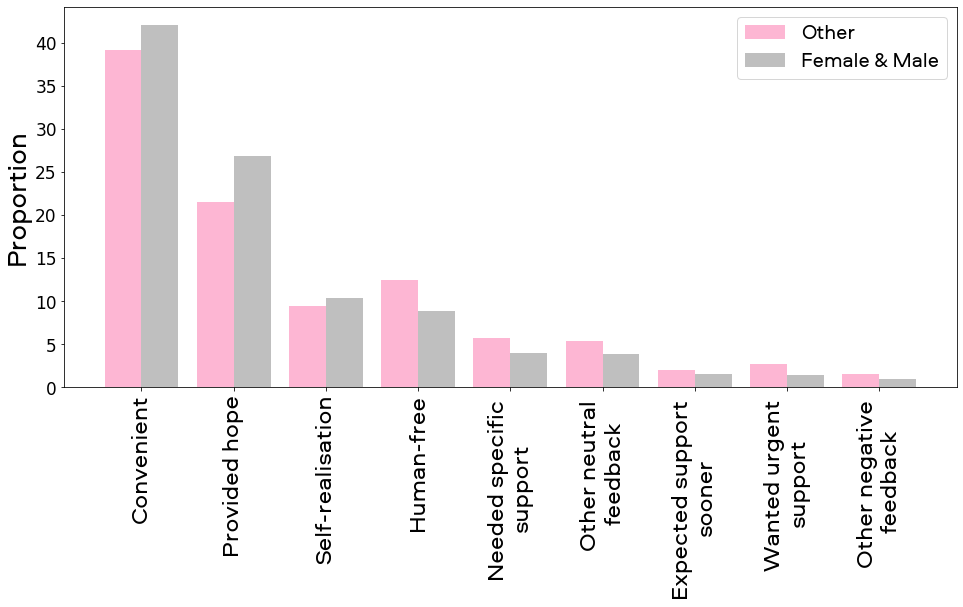

In [211]:
import numpy as np
import matplotlib.pyplot as plt

# label names in the correct order
label_names = ['Convenient', 
        'Provided hope',
        'Self-realisation', 
        'Human-free',
        'Needed specific support',
        'Other neutral feedback',
        'Expected support sooner',
        'Wanted urgent support',
        'Other negative feedback']

# create a list to hold the data for each label
data_list = []

# iterate through each label_name and extract the data for minority and majority
for label_name in label_names:
    
    # get the data for this label_name
    data = proportions_gender_3[proportions_gender_3['label_name'] == label_name]
    
    # group the data by broad_ethnicity and sum the proportions
    grouped = data.groupby('gender_grouped_3')['proportion'].sum()
    
    # extract the minority and majority values from the grouped data
    minority_value = grouped['Other']
    majority_value = grouped['Female & Male']
    
    # add the values to the data list
    data_list.append((minority_value, majority_value))

# create a numpy array to hold the data
data_array = np.array(data_list)

x_ticks = np.arange(len(label_names))
bar_width = 0.4

# create the figure and axes
fig, ax = plt.subplots(figsize=(16, 7))

# create the bars for minority and majority
ax.bar(x_ticks - bar_width/2, data_array[:, 0], width=bar_width, label='Other', color = '#fdb6d3')
ax.bar(x_ticks + bar_width/2, data_array[:, 1], width=bar_width, label='Female & Male', color = '#bfbfbf')

# set the x tick positions and labels
ax.set_xticks(x_ticks)
label_names = ['Convenient', 'Provided hope', 'Self-realisation', 'Human-free',
       'Needed specific \nsupport', 'Other neutral \nfeedback',
       'Expected support \nsooner', 'Wanted urgent \nsupport',
       'Other negative \nfeedback']

ax.set_xticklabels(label_names, rotation=90, fontsize=24, font = my_font)


# set the y-axis label to 'Proportion'
ax.set_ylabel('Proportion', fontsize=27, font = my_font)
plt.yticks(fontsize=17)

# add a legend
legend_font = my_font.copy()
legend_font.set_size(20)
ax.legend(prop=legend_font)

# show the plot
plt.show()

#save the plot
image_format = 'png' # e.g .png, .svg, etc.
image_name = folder_figures_save+'qual_feedback_gender.png'

# fig.savefig(image_name, format=image_format, bbox_inches="tight", dpi=1200)


### Plot ethnicity and run the stats


In [212]:
ethnicity_2_map = {'WHITE': 'White',
    'ASIAN': 'Asian & Black Groups',
    'MIXED': 'EVERYTHING ELSE',
    'OTHER': 'EVERYTHING ELSE',
    'NOT_ANSWERED/UNKNOWN': 'EVERYTHING ELSE', 
    'BLACK': 'Asian & Black Groups'
}

df['ethnicity_grouped_2'] = df['broad_ethnicity'].map(ethnicity_2_map)


In [213]:
for i in df['ethnicity_grouped_2'].unique():
    print(i, ':', len(df[df['ethnicity_grouped_2'] == i]))

White : 37272
Asian & Black Groups : 2499
EVERYTHING ELSE : 1794
nan : 0


In [214]:
from scipy import stats

# Calculate the average charcount for 'Other' and 'Female & Male''
print("Average charcount when ethnicity is 'Asian & Black Groups':", df[df['ethnicity_grouped_2'] == 'Asian & Black Groups']['feedback'].apply(len).mean())
print("Average charcount when ethnicity is 'White':", df[df['ethnicity_grouped_2'] == 'White']['feedback'].apply(len).mean())

# Separate the data into two groups based on 'gender_grouped_3'
group_other = df[df['ethnicity_grouped_2'] == 'Asian & Black Groups']['feedback'].apply(len)
group_white = df[df['ethnicity_grouped_2'] == 'White']['feedback'].apply(len)

# Perform a t-test
t_statistic_length_ethnic, p_value_length_ethnic = stats.ttest_ind(group_other, group_white)

print('t stats:', t_statistic_length_ethnic, ', p value = ', p_value_length_ethnic)


Average charcount when ethnicity is 'Asian & Black Groups': 50.182072829131656
Average charcount when ethnicity is 'White': 51.294564284181156
t stats: -1.0916616041694565 , p value =  0.2749884810722925


In [215]:
### create contingency table using total numbers, instead of proportions

counts_ethnicity_2 = df.groupby('ethnicity_grouped_2')['label_name'].value_counts()

proportions_ethnicity_2 = counts_ethnicity_2.groupby(level=0).apply(lambda x: (x / float(x.sum())*100)).reset_index(name='proportion')


counts_ethnicity_table = counts_ethnicity_2.groupby(level=0).apply(lambda x: x).reset_index(name='count')

df_contingency_ethnicity_counts = pd.crosstab(counts_ethnicity_table['ethnicity_grouped_2'], counts_ethnicity_table['label_name'], values=counts_ethnicity_table['count'], aggfunc='sum')

df_contingency_ethnicity_counts = df_contingency_ethnicity_counts.fillna(0) # change nan's to zeros 

order = ['Convenient', 
        'Provided hope',
        'Self-realisation', 
        'Human-free',
        'Needed specific support',
        'Other neutral feedback',
        'Expected support sooner',
        'Wanted urgent support',
        'Other negative feedback']

df_contingency_ethnicity_counts = df_contingency_ethnicity_counts.reindex(order, axis="columns")

df_contingency_ethnicity_counts


label_name,Convenient,Provided hope,Self-realisation,Human-free,Needed specific support,Other neutral feedback,Expected support sooner,Wanted urgent support,Other negative feedback
ethnicity_grouped_2,,,,,,,,,
Asian & Black Groups,1029,525,380,200,138,104,56,33,34
EVERYTHING ELSE,752,329,211,170,112,119,46,31,24
White,15580,10349,3723,3325,1414,1436,554,533,358


In [216]:
# Define a list of the minority ethnic groups to compare to white
minority_ethnicities = ['Asian & Black Groups']

# Define the column label for the reference group (white)
reference_group = 'White'

# Create an empty DataFrame to store the results
results_ethnicity = pd.DataFrame(columns=['feedback_type', 'ethnicity', 'chi2_stat', 'p_value', 'dof','corrected_p_value'])

# Loop through each type of feedback
for feedback_type in df_contingency_ethnicity_counts.columns:
    # Loop through each minority ethnic group
    for ethnicity in minority_ethnicities:
        # Extract the contingency table for the two groups being compared
        group1 = df_contingency_ethnicity_counts.loc[ethnicity, feedback_type] #the number of peeople who gave this specific feedback
        total_group1 = sum(df_contingency_ethnicity_counts.loc[ethnicity]) # total feedback from this group
        group2 = df_contingency_ethnicity_counts.loc[reference_group, feedback_type]
        total_group2 = sum(df_contingency_ethnicity_counts.loc[reference_group])
        
        feedback = np.array([[group1, (total_group1-group1)], [group2, (total_group2-group2)]])

        # Perform chi-square test for independence
        chi2_stat, p_value, dof, _ = chi2_contingency(feedback)

        # Concatenate the results to the results DataFrame
        new_results = pd.DataFrame({'feedback_type': feedback_type,
                                  'ethnicity': ethnicity,
                                  'chi2_stat': chi2_stat,
                                  'p_value': p_value,
                                  'dof': dof,
                                  'corrected_p_value': 18*p_value}, index=[0])
        results_ethnicity = pd.concat([results_ethnicity, new_results], ignore_index=True)


In [217]:
results_ethnicity

,feedback_type,ethnicity,chi2_stat,p_value,dof,corrected_p_value
0,Convenient,Asian & Black Groups,0.350126,0.554042,1,9.972755
1,Provided hope,Asian & Black Groups,53.49694,0.0,1,0.0
2,Self-realisation,Asian & Black Groups,68.339802,0.0,1,0.0
3,Human-free,Asian & Black Groups,2.329466,0.126945,1,2.285018
4,Needed specific support,Asian & Black Groups,18.200193,0.00002,1,0.000358
5,Other neutral feedback,Asian & Black Groups,0.520268,0.470727,1,8.473092
6,Expected support sooner,Asian & Black Groups,8.335829,0.003887,1,0.069967
7,Wanted urgent support,Asian & Black Groups,0.129719,0.718723,1,12.937021
8,Other negative feedback,Asian & Black Groups,3.441345,0.063584,1,1.14451


In [218]:
proportions_ethnicity_2

,ethnicity_grouped_2,label_name,proportion
0,Asian & Black Groups,Convenient,41.176471
1,Asian & Black Groups,Provided hope,21.008403
2,Asian & Black Groups,Self-realisation,15.206082
3,Asian & Black Groups,Human-free,8.003201
4,Asian & Black Groups,Needed specific support,5.522209
5,Asian & Black Groups,Other neutral feedback,4.161665
6,Asian & Black Groups,Expected support sooner,2.240896
7,Asian & Black Groups,Other negative feedback,1.360544
8,Asian & Black Groups,Wanted urgent support,1.320528
9,EVERYTHING ELSE,Convenient,41.917503


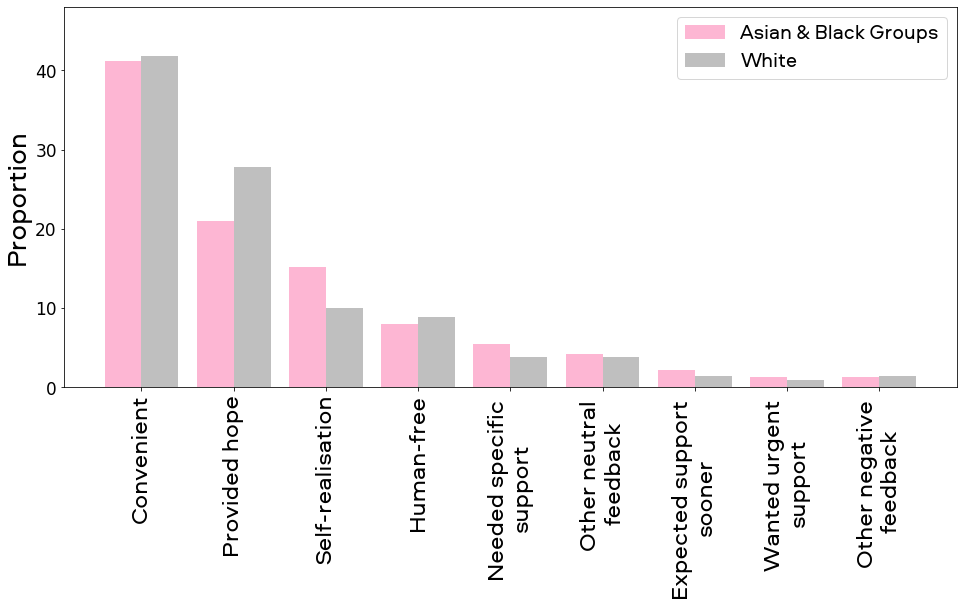

In [219]:
import numpy as np
import matplotlib.pyplot as plt

# get the unique label names
label_names = proportions_ethnicity_2['label_name'].unique()

# create a list to hold the data for each label
data_list = []

# iterate through each label_name and extract the data for minority and majority
for label_name in label_names:
    
    # get the data for this label_name
    data = proportions_ethnicity_2[proportions_ethnicity_2['label_name'] == label_name]
    
    # group the data by broad_ethnicity and sum the proportions
    grouped = data.groupby('ethnicity_grouped_2')['proportion'].sum()
    
    # extract the minority and majority values from the grouped data
    minority_value = grouped['Asian & Black Groups']
    majority_value = grouped['White']
    
    # add the values to the data list
    data_list.append((minority_value, majority_value))

# create a numpy array to hold the data
data_array = np.array(data_list)

# create an array of x tick positions
x_ticks = np.arange(len(label_names))

# set the width of the bars
bar_width = 0.4

# create the figure and axes
fig, ax = plt.subplots(figsize=(16, 7))

# create the bars for minority and majority
ax.bar(x_ticks - bar_width/2, data_array[:, 0], width=bar_width, label='Asian & Black Groups', color = '#fdb6d3')
ax.bar(x_ticks + bar_width/2, data_array[:, 1], width=bar_width, label='White', color = '#bfbfbf')

# set the x tick positions and labels
ax.set_xticks(x_ticks)
label_names = ['Convenient', 'Provided hope', 'Self-realisation', 'Human-free',
       'Needed specific \nsupport', 'Other neutral \nfeedback',
       'Expected support \nsooner', 'Wanted urgent \nsupport',
       'Other negative \nfeedback']

ax.set_xticklabels(label_names, rotation=90, fontsize=24, font = my_font)


# set the y-axis label to 'Proportion'
ax.set_ylabel('Proportion', fontsize=27, font = my_font)
plt.yticks(fontsize=17)

plt.ylim(0,48)

# add a legend
legend_font = my_font.copy()
legend_font.set_size(20)
ax.legend(prop=legend_font)


# show the plot
plt.show()

#save the plot
image_format = 'png' # e.g .png, .svg, etc.
image_name = folder_figures_save+'qual_feedback_ethnicity.png'

# fig.savefig(image_name, format=image_format, bbox_inches="tight", dpi=1200)


## Supplementary figure 2 - all minority groups vs majority groups

In [220]:
### gender

gender_2_map = {'MALE': 'Female & Male',
    'NON_BINARY': 'Minority',
    'OTHER': 'Minority',
    'NOT_ANSWERED/UNKNOWN': 'Minority', 
    'FEMALE': 'Female & Male'
}

df['gender_grouped_2'] = df['gender_grouped'].map(gender_2_map)

In [221]:
### create contingency table using total numbers, instead of proportions

counts_gender_2 = df.groupby('gender_grouped_2')['label_name'].value_counts()

proportions_gender_2 = counts_gender_2.groupby(level=0).apply(lambda x: (x / float(x.sum())*100)).reset_index(name='proportion')

counts_gender_table = counts_gender_2.groupby(level=0).apply(lambda x: x).reset_index(name='count')

df_contingency_gender_counts = pd.crosstab(counts_gender_table['gender_grouped_2'], counts_gender_table['label_name'], values=counts_gender_table['count'], aggfunc='sum')

df_contingency_gender_counts = df_contingency_gender_counts.fillna(0) # change nan's to zeros 

order = ['Convenient', 
        'Provided hope',
        'Self-realisation', 
        'Human-free',
        'Needed specific support',
        'Other neutral feedback',
        'Expected support sooner',
        'Wanted urgent support',
        'Other negative feedback']

df_contingency_gender_counts = df_contingency_gender_counts.reindex(order, axis="columns")

df_contingency_gender_counts


label_name,Convenient,Provided hope,Self-realisation,Human-free,Needed specific support,Other neutral feedback,Expected support sooner,Wanted urgent support,Other negative feedback
gender_grouped_2,,,,,,,,,
Female & Male,17262,11033,4270,3642,1621,1606,642,584,403
Minority,493,270,122,152,73,80,26,33,20


In [222]:
# Define a list of the minority ethnic groups to compare to white
minority_gender = ['Minority']

# Define the column label for the reference group (white)
reference_group = 'Female & Male'

# Create an empty DataFrame to store the results
results_gender = pd.DataFrame(columns=['feedback_type', 'gender', 'chi2_stat', 'p_value'])

# Loop through each type of feedback
for feedback_type in df_contingency_gender_counts.columns:
    # Loop through each minority ethnic group
    for gender in minority_gender:
        # Extract the contingency table for the two groups being compared
        group1 = df_contingency_gender_counts.loc[gender, feedback_type] #the number of peeople who gave this specific feedback
        total_group1 = sum(df_contingency_gender_counts.loc[gender]) # total feedback from this group
        group2 = df_contingency_gender_counts.loc[reference_group, feedback_type]
        total_group2 = sum(df_contingency_gender_counts.loc[reference_group])
        
        feedback = np.array([[group1, (total_group1-group1)], [group2, (total_group2-group2)]])

        # Perform chi-square test for independence
        chi2_stat, p_value, _, _ = chi2_contingency(feedback)

       # Concatenate the results to the results DataFrame
        new_results = pd.DataFrame({'feedback_type': feedback_type,
                                  'gender': gender,
                                  'chi2_stat': chi2_stat,
                                  'p_value': p_value,
                                  'dof': dof,
                                  'corrected_p_value': 27*p_value}, index=[0])
        results_gender = pd.concat([results_gender, new_results], ignore_index=True)


In [223]:
results_gender

,feedback_type,gender,chi2_stat,p_value,dof,corrected_p_value
0,Convenient,Minority,5.008742,0.02522,1.0,0.680930
1,Provided hope,Minority,19.382156,0.000011,1.0,0.000289
2,Self-realisation,Minority,0.7331,0.39188,1.0,10.580766
3,Human-free,Minority,14.200723,0.000164,1.0,0.004436
4,Needed specific support,Minority,9.97481,0.001587,1.0,0.042848
5,Other neutral feedback,Minority,17.814058,0.000024,1.0,0.000658
6,Expected support sooner,Minority,1.568009,0.210496,1.0,5.683403
7,Wanted urgent support,Minority,11.092269,0.000867,1.0,0.023406
8,Other negative feedback,Minority,3.81912,0.050671,1.0,1.368113


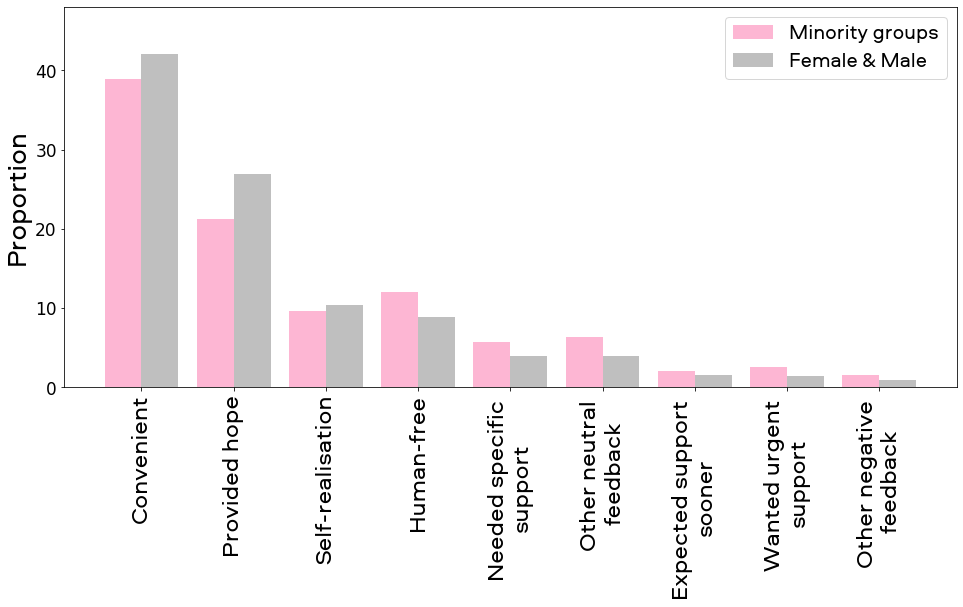

In [224]:
import numpy as np
import matplotlib.pyplot as plt

# label names in the correct order
label_names = ['Convenient', 
        'Provided hope',
        'Self-realisation', 
        'Human-free',
        'Needed specific support',
        'Other neutral feedback',
        'Expected support sooner',
        'Wanted urgent support',
        'Other negative feedback']

# create a list to hold the data for each label
data_list = []

# iterate through each label_name and extract the data for minority and majority
for label_name in label_names:
    
    # get the data for this label_name
    data = proportions_gender_2[proportions_gender_2['label_name'] == label_name]
    
    # group the data by broad_ethnicity and sum the proportions
    grouped = data.groupby('gender_grouped_2')['proportion'].sum()
    
    # extract the minority and majority values from the grouped data
    minority_value = grouped['Minority']
    majority_value = grouped['Female & Male']
    
    # add the values to the data list
    data_list.append((minority_value, majority_value))

# create a numpy array to hold the data
data_array = np.array(data_list)

x_ticks = np.arange(len(label_names))
bar_width = 0.4

# create the figure and axes
fig, ax = plt.subplots(figsize=(16, 7))

# create the bars for minority and majority
ax.bar(x_ticks - bar_width/2, data_array[:, 0], width=bar_width, label='Minority groups', color = '#fdb6d3')
ax.bar(x_ticks + bar_width/2, data_array[:, 1], width=bar_width, label='Female & Male', color = '#bfbfbf')

# set the x tick positions and labels
ax.set_xticks(x_ticks)
label_names = ['Convenient', 'Provided hope', 'Self-realisation', 'Human-free',
       'Needed specific \nsupport', 'Other neutral \nfeedback',
       'Expected support \nsooner', 'Wanted urgent \nsupport',
       'Other negative \nfeedback']

ax.set_xticklabels(label_names, rotation=90, fontsize=24, font = my_font)


# set the y-axis label to 'Proportion'
ax.set_ylabel('Proportion', fontsize=27, font = my_font)
plt.yticks(fontsize=17)

# add a legend
legend_font = my_font.copy()
legend_font.set_size(20)
ax.legend(prop=legend_font)

plt.ylim(0,48)

# show the plot
plt.show()

#save the plot
image_format = 'png' # e.g .png, .svg, etc.
image_name = folder_figures_save+'qual_feedback_gender_supplement.png'

# fig.savefig(image_name, format=image_format, bbox_inches="tight", dpi=1200)


In [225]:
#### sexuality

sexuality_2_map = {'BISEXUAL': 'Minority groups',
    'HOMOSEXUAL': 'Minority groups',
    'OTHER': 'Minority groups',
    'NOT_ANSWERED/UNKNOWN': 'Minority groups', 
    'HETEROSEXUAL': 'Heterosexual'
}

df['sexuality_grouped_2'] = df['sexuality_grouped'].map(sexuality_2_map)

In [226]:
### create contingency table using total numbers, instead of proportions

counts_sexuality_2 = df.groupby('sexuality_grouped_2')['label_name'].value_counts()

proportions_sexuality_2 = counts_sexuality_2.groupby(level=0).apply(lambda x: (x / float(x.sum())*100)).reset_index(name='proportion')


counts_sexuality_table = counts_sexuality_2.groupby(level=0).apply(lambda x: x).reset_index(name='count')

df_contingency_sexuality_counts = pd.crosstab(counts_sexuality_table['sexuality_grouped_2'], counts_sexuality_table['label_name'], values=counts_sexuality_table['count'], aggfunc='sum')

df_contingency_sexuality_counts = df_contingency_sexuality_counts.fillna(0) # change nan's to zeros 

order = ['Convenient', 
        'Provided hope',
        'Self-realisation', 
        'Human-free',
        'Needed specific support',
        'Other neutral feedback',
        'Expected support sooner',
        'Wanted urgent support',
        'Other negative feedback']

df_contingency_sexuality_counts = df_contingency_sexuality_counts.reindex(order, axis="columns")

df_contingency_sexuality_counts


label_name,Convenient,Provided hope,Self-realisation,Human-free,Needed specific support,Other neutral feedback,Expected support sooner,Wanted urgent support,Other negative feedback
sexuality_grouped_2,,,,,,,,,
Heterosexual,14375,9638,3622,2778,1282,1296,555,492,334
Minority groups,3226,1592,742,945,387,367,108,119,86


In [227]:
# Define a list of the minority ethnic groups to compare to white
minority_sexuality = ['Minority groups']

# Define the column label for the reference group (white)
reference_group = 'Heterosexual'

# Create an empty DataFrame to store the results
results_sexuality = pd.DataFrame(columns=['feedback_type', 'sexuality', 'chi2_stat', 'p_value'])

# Loop through each type of feedback
for feedback_type in df_contingency_sexuality_counts.columns:
    # Loop through each minority ethnic group
    for sexuality in minority_sexuality:
        # Extract the contingency table for the two groups being compared
        group1 = df_contingency_sexuality_counts.loc[sexuality, feedback_type] #the number of peeople who gave this specific feedback
        total_group1 = sum(df_contingency_sexuality_counts.loc[sexuality]) # total feedback from this group
        group2 = df_contingency_sexuality_counts.loc[reference_group, feedback_type]
        total_group2 = sum(df_contingency_sexuality_counts.loc[reference_group])
        
        feedback = np.array([[group1, (total_group1-group1)], [group2, (total_group2-group2)]])

        # Perform chi-square test for independence
        chi2_stat, p_value, _, _ = chi2_contingency(feedback)

        # Concatenate the results to the results DataFrame
        new_results = pd.DataFrame({'feedback_type': feedback_type,
                                  'sexuality': sexuality,
                                  'chi2_stat': chi2_stat,
                                  'p_value': p_value,
                                  'dof': dof,
                                  'corrected_p_value': 27*p_value}, index=[0])
        results_sexuality = pd.concat([results_sexuality, new_results], ignore_index=True)


In [228]:
results_sexuality

,feedback_type,sexuality,chi2_stat,p_value,dof,corrected_p_value
0,Convenient,Minority groups,1.5281,0.216398,1.0,5.842742e+00
1,Provided hope,Minority groups,155.410494,0.0,1.0,3.075054e-34
2,Self-realisation,Minority groups,3.550424,0.05953,1.0,1.607316e+00
3,Human-free,Minority groups,147.847415,0.0,1.0,1.383086e-32
4,Needed specific support,Minority groups,30.61934,0.0,1.0,8.476616e-07
5,Other neutral feedback,Minority groups,18.596299,0.000016,1.0,4.361414e-04
6,Expected support sooner,Minority groups,1.296922,0.254776,1.0,6.878956e+00
7,Wanted urgent support,Minority groups,0.754588,0.385028,1.0,1.039574e+01
8,Other negative feedback,Minority groups,1.522994,0.217167,1.0,5.863509e+00


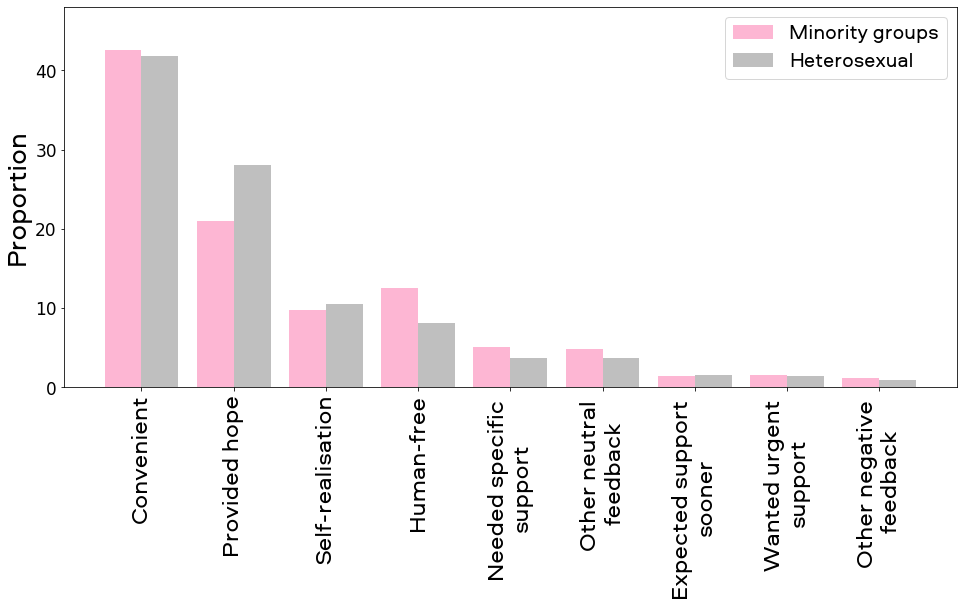

In [229]:
import numpy as np
import matplotlib.pyplot as plt

# label names in the correct order
label_names = ['Convenient', 
        'Provided hope',
        'Self-realisation', 
        'Human-free',
        'Needed specific support',
        'Other neutral feedback',
        'Expected support sooner',
        'Wanted urgent support',
        'Other negative feedback']

# create a list to hold the data for each label
data_list = []

# iterate through each label_name and extract the data for minority and majority
for label_name in label_names:
    
    # get the data for this label_name
    data = proportions_sexuality_2[proportions_sexuality_2['label_name'] == label_name]
    
    # group the data by broad_ethnicity and sum the proportions
    grouped = data.groupby('sexuality_grouped_2')['proportion'].sum()
    
    # extract the minority and majority values from the grouped data
    minority_value = grouped['Minority groups']
    majority_value = grouped['Heterosexual']
    
    # add the values to the data list
    data_list.append((minority_value, majority_value))

# create a numpy array to hold the data
data_array = np.array(data_list)

x_ticks = np.arange(len(label_names))
bar_width = 0.4

# create the figure and axes
fig, ax = plt.subplots(figsize=(16, 7))

# create the bars for minority and majority
ax.bar(x_ticks - bar_width/2, data_array[:, 0], width=bar_width, label='Minority groups', color = '#fdb6d3')
ax.bar(x_ticks + bar_width/2, data_array[:, 1], width=bar_width, label='Heterosexual', color = '#bfbfbf')

# set the x tick positions and labels
ax.set_xticks(x_ticks)
label_names = ['Convenient', 'Provided hope', 'Self-realisation', 'Human-free',
       'Needed specific \nsupport', 'Other neutral \nfeedback',
       'Expected support \nsooner', 'Wanted urgent \nsupport',
       'Other negative \nfeedback']

ax.set_xticklabels(label_names, rotation=90, fontsize=24, font = my_font)


# set the y-axis label to 'Proportion'
ax.set_ylabel('Proportion', fontsize=27, font = my_font)
plt.yticks(fontsize=17)

# add a legend
legend_font = my_font.copy()
legend_font.set_size(20)
ax.legend(prop=legend_font)

plt.ylim(0,48)

# show the plot
plt.show()

#save the plot

image_format = 'png' # e.g .png, .svg, etc.
image_name = folder_figures_save+'qual_feedback_sexuality_supplement.png'

# fig.savefig(image_name, format=image_format, bbox_inches="tight", dpi=1200)


In [230]:
#### ethnicity

ethnicity_3_map = {'WHITE': 'White',
    'ASIAN': 'Minority groups',
    'MIXED': 'Minority groups',
    'OTHER': 'Minority groups',
    'NOT_ANSWERED/UNKNOWN': 'Minority groups', 
    'BLACK': 'Minority groups'
}

df['ethnicity_grouped_3'] = df['broad_ethnicity'].map(ethnicity_3_map)

In [231]:
### create contingency table using total numbers, instead of proportions

counts_ethnicity_2 = df.groupby('ethnicity_grouped_3')['label_name'].value_counts()
proportions_ethnicity_2 = counts_ethnicity_2.groupby(level=0).apply(lambda x: (x / float(x.sum())*100)).reset_index(name='proportion')


counts_ethnicity_table = counts_ethnicity_2.groupby(level=0).apply(lambda x: x).reset_index(name='count')

df_contingency_ethnicity_counts = pd.crosstab(counts_ethnicity_table['ethnicity_grouped_3'], counts_ethnicity_table['label_name'], values=counts_ethnicity_table['count'], aggfunc='sum')

df_contingency_ethnicity_counts = df_contingency_ethnicity_counts.fillna(0) # change nan's to zeros 

order = ['Convenient', 
        'Provided hope',
        'Self-realisation', 
        'Human-free',
        'Needed specific support',
        'Other neutral feedback',
        'Expected support sooner',
        'Wanted urgent support',
        'Other negative feedback']

df_contingency_ethnicity_counts = df_contingency_ethnicity_counts.reindex(order, axis="columns")

df_contingency_ethnicity_counts


label_name,Convenient,Provided hope,Self-realisation,Human-free,Needed specific support,Other neutral feedback,Expected support sooner,Wanted urgent support,Other negative feedback
ethnicity_grouped_3,,,,,,,,,
Minority groups,1781,854,591,370,250,223,102,64,58
White,15580,10349,3723,3325,1414,1436,554,533,358


In [232]:

# Define a list of the minority ethnic groups to compare to white
minority_ethnicities = ['Minority groups']

# Define the column label for the reference group (white)
reference_group = 'White'

# Create an empty DataFrame to store the results
results_ethnicity = pd.DataFrame(columns=['feedback_type', 'ethnicity', 'chi2_stat', 'p_value'])

# Loop through each type of feedback
for feedback_type in df_contingency_ethnicity_counts.columns:
    # Loop through each minority ethnic group
    for ethnicity in minority_ethnicities:
        # Extract the contingency table for the two groups being compared
        group1 = df_contingency_ethnicity_counts.loc[ethnicity, feedback_type] #the number of peeople who gave this specific feedback
        total_group1 = sum(df_contingency_ethnicity_counts.loc[ethnicity]) # total feedback from this group
        group2 = df_contingency_ethnicity_counts.loc[reference_group, feedback_type]
        total_group2 = sum(df_contingency_ethnicity_counts.loc[reference_group])
        
        feedback = np.array([[group1, (total_group1-group1)], [group2, (total_group2-group2)]])

        # Perform chi-square test for independence
        chi2_stat, p_value, _, _ = chi2_contingency(feedback)

        # Concatenate the results to the results DataFrame
        new_results = pd.DataFrame({'feedback_type': feedback_type,
                                  'ethnicity': ethnicity,
                                  'chi2_stat': chi2_stat,
                                  'p_value': p_value,
                                  'dof': dof,
                                  'corrected_p_value': 27*p_value}, index=[0])
        results_ethnicity = pd.concat([results_ethnicity, new_results], ignore_index=True)


In [233]:
results_ethnicity

0.0006

0.0006

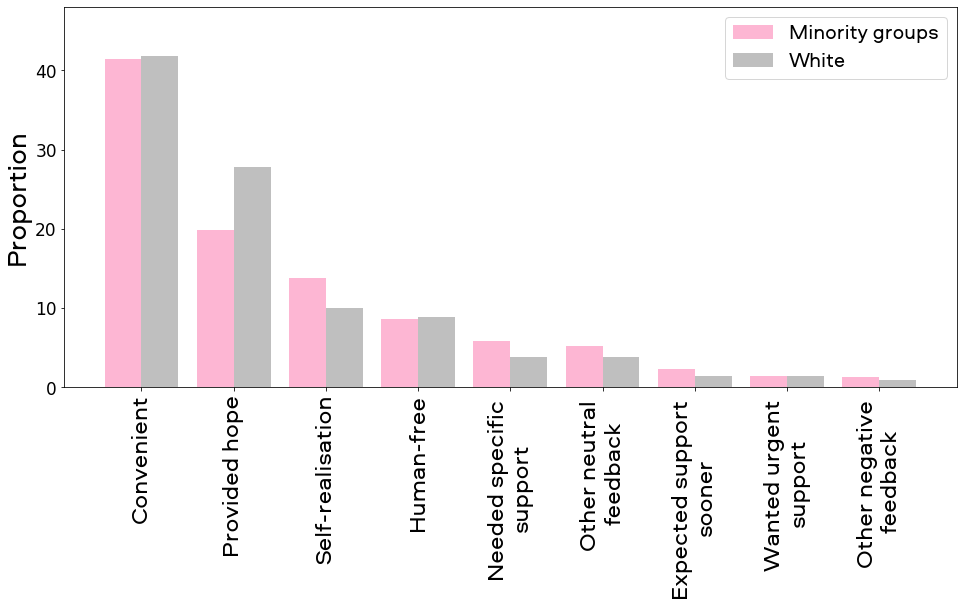

In [234]:
import numpy as np
import matplotlib.pyplot as plt

# get the unique label names
label_names = proportions_ethnicity_2['label_name'].unique()

# create a list to hold the data for each label
data_list = []

# iterate through each label_name and extract the data for minority and majority
for label_name in label_names:
    
    # get the data for this label_name
    data = proportions_ethnicity_2[proportions_ethnicity_2['label_name'] == label_name]
    
    # group the data by broad_ethnicity and sum the proportions
    grouped = data.groupby('ethnicity_grouped_3')['proportion'].sum()
    
    # extract the minority and majority values from the grouped data
    minority_value = grouped['Minority groups']
    majority_value = grouped['White']
    
    # add the values to the data list
    data_list.append((minority_value, majority_value))

# create a numpy array to hold the data
data_array = np.array(data_list)

# create an array of x tick positions
x_ticks = np.arange(len(label_names))

# set the width of the bars
bar_width = 0.4

# create the figure and axes
fig, ax = plt.subplots(figsize=(16, 7))

# create the bars for minority and majority
ax.bar(x_ticks - bar_width/2, data_array[:, 0], width=bar_width, label='Minority groups', color = '#fdb6d3')
ax.bar(x_ticks + bar_width/2, data_array[:, 1], width=bar_width, label='White', color = '#bfbfbf')

# set the x tick positions and labels
ax.set_xticks(x_ticks)
label_names = ['Convenient', 'Provided hope', 'Self-realisation', 'Human-free',
       'Needed specific \nsupport', 'Other neutral \nfeedback',
       'Expected support \nsooner', 'Wanted urgent \nsupport',
       'Other negative \nfeedback']

ax.set_xticklabels(label_names, rotation=90, fontsize=24, font = my_font)


# set the y-axis label to 'Proportion'
ax.set_ylabel('Proportion', fontsize=27, font = my_font)
plt.yticks(fontsize=17)

plt.ylim(0,48)

# add a legend
legend_font = my_font.copy()
legend_font.set_size(20)
ax.legend(prop=legend_font)


# show the plot
plt.show()

#save the plot
image_format = 'png' # e.g .png, .svg, etc.
image_name = folder_figures_save+'qual_feedback_ethnicity_supplement.png'

# fig.savefig(image_name, format=image_format, bbox_inches="tight", dpi=1200)
